# Time-Series Stationarity Requirements

In [1]:
import pandas as pd

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
series_df = pd.read_csv("data/daily-total-female-births.csv")

## Requirement \#1:
### The variable is not a function of time.

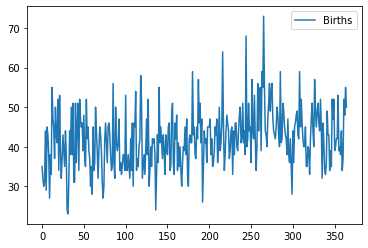

In [3]:
series_df.plot()

In [89]:
for i, value in enumerate(series_df['Births'].values):
    print("{x:", i,", y:",value,"},")

{x: 0 , y: 35 },
{x: 1 , y: 32 },
{x: 2 , y: 30 },
{x: 3 , y: 31 },
{x: 4 , y: 44 },
{x: 5 , y: 29 },
{x: 6 , y: 45 },
{x: 7 , y: 43 },
{x: 8 , y: 38 },
{x: 9 , y: 27 },
{x: 10 , y: 38 },
{x: 11 , y: 33 },
{x: 12 , y: 55 },
{x: 13 , y: 47 },
{x: 14 , y: 45 },
{x: 15 , y: 37 },
{x: 16 , y: 50 },
{x: 17 , y: 43 },
{x: 18 , y: 41 },
{x: 19 , y: 52 },
{x: 20 , y: 34 },
{x: 21 , y: 53 },
{x: 22 , y: 39 },
{x: 23 , y: 32 },
{x: 24 , y: 37 },
{x: 25 , y: 43 },
{x: 26 , y: 39 },
{x: 27 , y: 35 },
{x: 28 , y: 44 },
{x: 29 , y: 38 },
{x: 30 , y: 24 },
{x: 31 , y: 23 },
{x: 32 , y: 31 },
{x: 33 , y: 44 },
{x: 34 , y: 38 },
{x: 35 , y: 50 },
{x: 36 , y: 38 },
{x: 37 , y: 51 },
{x: 38 , y: 31 },
{x: 39 , y: 31 },
{x: 40 , y: 51 },
{x: 41 , y: 36 },
{x: 42 , y: 45 },
{x: 43 , y: 51 },
{x: 44 , y: 34 },
{x: 45 , y: 52 },
{x: 46 , y: 47 },
{x: 47 , y: 45 },
{x: 48 , y: 46 },
{x: 49 , y: 39 },
{x: 50 , y: 48 },
{x: 51 , y: 37 },
{x: 52 , y: 35 },
{x: 53 , y: 52 },
{x: 54 , y: 42 },
{x: 55 , y: 45 },
{x

## Requirement \#2:
### The rolling mean doesn't change over time

In [24]:
slope = 0.1
series_df['Births_moving'] = [(slope * i) + birth for i, birth in enumerate(series_df['Births'].values)]

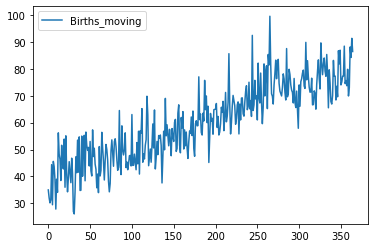

In [39]:
series_df['Births_moving'].plot()
plt.legend()
plt.show()

In [98]:
for i, value in enumerate(series_df['Births'].rolling(window = 40).cov()):
    print("{x:", i,", y:",value,"},")

{x: 0 , y: nan },
{x: 1 , y: nan },
{x: 2 , y: nan },
{x: 3 , y: nan },
{x: 4 , y: nan },
{x: 5 , y: nan },
{x: 6 , y: nan },
{x: 7 , y: nan },
{x: 8 , y: nan },
{x: 9 , y: nan },
{x: 10 , y: nan },
{x: 11 , y: nan },
{x: 12 , y: nan },
{x: 13 , y: nan },
{x: 14 , y: nan },
{x: 15 , y: nan },
{x: 16 , y: nan },
{x: 17 , y: nan },
{x: 18 , y: nan },
{x: 19 , y: nan },
{x: 20 , y: nan },
{x: 21 , y: nan },
{x: 22 , y: nan },
{x: 23 , y: nan },
{x: 24 , y: nan },
{x: 25 , y: nan },
{x: 26 , y: nan },
{x: 27 , y: nan },
{x: 28 , y: nan },
{x: 29 , y: nan },
{x: 30 , y: nan },
{x: 31 , y: nan },
{x: 32 , y: nan },
{x: 33 , y: nan },
{x: 34 , y: nan },
{x: 35 , y: nan },
{x: 36 , y: nan },
{x: 37 , y: nan },
{x: 38 , y: nan },
{x: 39 , y: 64.96153846153855 },
{x: 40 , y: 68.28461538461548 },
{x: 41 , y: 67.21794871794862 },
{x: 42 , y: 65.727564102564 },
{x: 43 , y: 66.88141025641016 },
{x: 44 , y: 67.39423076923067 },
{x: 45 , y: 67.7923076923073 },
{x: 46 , y: 68.35897435897445 },
{x: 47 ,

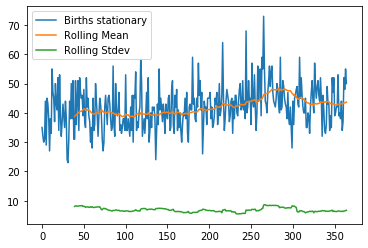

In [95]:
# Calculate rolling mean of original time-series.
rolling_mean = series_df['Births'].rolling(window = 40).mean()
rolling_std = series_df['Births'].rolling(window = 40).std()

# Plot for visualization purposes.
series_df['Births'].plot(label="Births stationary")
rolling_mean.plot(label="Rolling Mean")
rolling_std.plot(label="Rolling Stdev")
plt.legend()
plt.show()

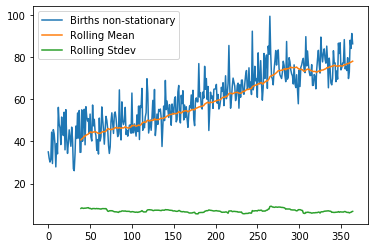

In [82]:
# Calculate rolling mean of non-stationary time-series.
rolling_mean = series_df['Births_moving'].rolling(window = 40).mean()
rolling_std = series_df['Births_moving'].rolling(window = 40).std()

# Plot for visualization purposes.
series_df['Births_moving'].plot(label="Births non-stationary")
rolling_mean.plot(label="Rolling Mean")
rolling_std.plot(label="Rolling Stdev")
plt.legend()
plt.show()

## Requirement \#3:
### The rolling standard deviation doesn't change over time (homoscedasticity)

In [74]:
slope = 0.1
series_df['Births_moving_std'] = [(slope * i) * birth for i, birth in enumerate(series_df['Births'].values)]

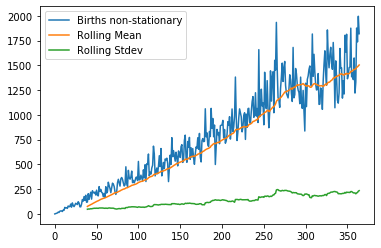

In [91]:
# Calculate rolling mean of monotonic-increasing std time-series.
rolling_mean = series_df['Births_moving_std'].rolling(window = 40).mean()
rolling_std = series_df['Births_moving_std'].rolling(window = 40).std()

# Plot for visualization purposes.
series_df['Births_moving_std'].plot(label="Births non-stationary")
rolling_mean.plot(label="Rolling Mean")
rolling_std.plot(label="Rolling Stdev")
plt.legend()
plt.show()

## Requirement \#4:
### The covariance between the ith and (i+m)th term in series isn't a function of time

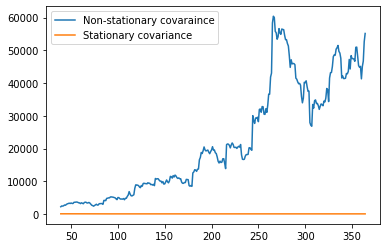

In [80]:
# Compare covariance between stationary and non-moving time series.
moving_cov = series_df['Births_moving_std'].rolling(window = 40).cov()
stat_cov = series_df['Births'].rolling(window = 40).cov()

moving_cov.plot(label="Non-stationary covaraince")
stat_cov.plot(label="Stationary covariance")
plt.legend()
plt.show()

## Requirement \#5:
### The Augmented Dicky-Fuller test has a p-value such that the hypothesis that the time-series is not stationary can be rejected.

In [43]:
from statsmodels.tsa.stattools import adfuller

In [50]:
print('p-value of Births time-series: %f' % adfuller(series_df['Births'])[1])

p-value of Births time-series: 0.000052


In [51]:
print('p-value of Births time-series: %f' % adfuller(series_df['Births_moving'])[1])

p-value of Births time-series: 0.681591
